<a href="https://colab.research.google.com/github/rekhachakkara/python_projects/blob/master/powerlifting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def pretty_print(df, n):
  print(tabulate(df.head(n),headers='keys',tablefmt='psql'))

In [ ]:
from os import lockf
import pandas as pd
from tabulate import tabulate # tabulate helps to convert the data into tabular form with heares and format eype
data_excel = pd.read_csv("/content/drive/MyDrive/Data_set_rekha/openpowerlifting.csv")
#print("reading from excel all datas",data_excel.to_string)
#data_excel.head()
#data_excel.tail()
#table_format = tabulate(data_excel.head(),headers="keys",tablefmt="html")
table_format = tabulate(data_excel.head(),headers="keys",tablefmt="pSql")
#print("table",table_format)
#to_frame - convert the SerieS object into dataframe
#reSet_index - allowS the index to be reSeted to 0,1,2 etc
#.Size - count the occurence of the groupby
#Syntax: DataFrame.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=False, **kwargs)
groupby_male = data_excel.loc[data_excel['Sex'] == "M"].groupby(['State']).size().to_frame('count').reset_index()
Sorted_male = groupby_male.sort_values(by=['count'],ascending=True)
#groupby.mean() #mean remove empty cellS
pretty_print(Sorted_male,10)
groupby_fem = data_excel.loc[data_excel['Sex'] == "F"].groupby(['State']).size().to_frame('count').reset_index()
Sorted_fem = groupby_fem.sort_values(by=['count'],ascending=False)
#groupby.mean() #mean remove empty cellS
pretty_print(Sorted_fem,10)






<ipython-input-6-3380c2dc6887>:4: DtypeWarning: Columns (33,35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  data_excel = pd.read_csv("/content/drive/MyDrive/Data_set_rekha/openpowerlifting.csv")


+----+---------+---------+
|    | State   |   count |
|----+---------+---------|
| 75 | MP      |       1 |
| 32 | ER      |       1 |
| 44 | HEN     |       1 |
| 49 | HUN     |       1 |
| 56 | JL      |       1 |
| 22 | CM      |       1 |
| 58 | JX      |       1 |
| 64 | LN      |       1 |
| 18 | CAN     |       1 |
| 33 | ES      |       1 |
+----+---------+---------+
+-----+---------+---------+
|     | State   |   count |
|-----+---------+---------|
|  15 | CA      |   19802 |
| 115 | TX      |   16280 |
|  30 | FL      |    7734 |
| 124 | WI      |    6230 |
|  69 | NC      |    6123 |
|  83 | NY      |    6086 |
| 121 | WA      |    5970 |
| 117 | VA      |    5921 |
|  88 | PA      |    5707 |
|  84 | OH      |    5705 |
+-----+---------+---------+


<ipython-input-25-b5c29cfab84e>:7: DtypeWarning: Columns (33,35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  data_excel_top = pd.read_csv("/content/drive/MyDrive/Data_set_rekha/openpowerlifting.csv")




['State', 'count']


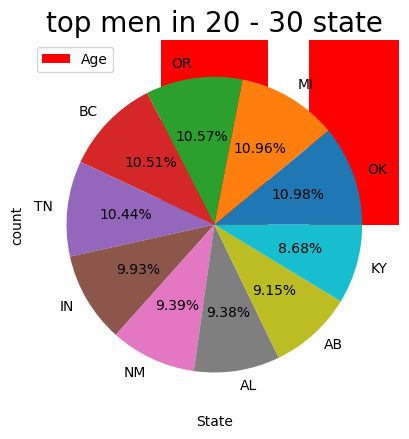

In [25]:
#Plot pie chart and bar chart for Men Top 20-30 states. Matplotlib and Seaborn
from os import lockf
import pandas as pd
import html
import matplotlib.pyplot as plt
from tabulate import tabulate # tabulate helps to convert the data into tabular form with heares and format eype
data_excel_top = pd.read_csv("/content/drive/MyDrive/Data_set_rekha/openpowerlifting.csv")
df_usa_men = data_excel_top[(data_excel_top["Sex"] == "M") & (data_excel_top["Country"] == "USA")]
df_state = data_excel_top.loc[data_excel_top['Sex'] == "M"].groupby(['State']).size().to_frame('count').reset_index()
df_usa_men_sorted = df_state.sort_values(by='count',ascending=False)
#print(df_usa_men.head())
#print(df_state.head())
#print(df_usa_men_sorted.head())
df_men = df_usa_men_sorted.iloc[20:30]
x = list(df_men["State"])
y = list(df_men["count"])
plt.bar(x, y, color='r', width=0.72, label="Age")
plt.xlabel("State")
plt.ylabel("count")
plt.title("top 20 -30 men in state")
plt.legend()
plt.show
print('\n')

plt.pie(y,labels=x,autopct='%.2f%%')
plt.title("top men in 20 - 30 state", fontsize=20)
plt.show
print(list(df_men))

<ipython-input-26-624ecd7554d6>:7: DtypeWarning: Columns (33,35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  data_excel_top_w = pd.read_csv("/content/drive/MyDrive/Data_set_rekha/openpowerlifting.csv")




['State', 'count']


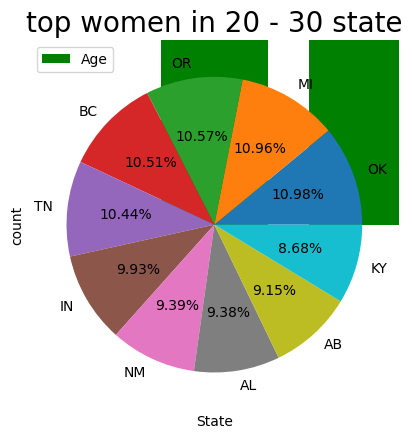

In [26]:
#Plot pie chart and bar chart for women Top 20-30 states. Matplotlib and Seaborn
from os import lockf
import pandas as pd
import html
import matplotlib.pyplot as plt
from tabulate import tabulate # tabulate helps to convert the data into tabular form with heares and format eype
data_excel_top_w = pd.read_csv("/content/drive/MyDrive/Data_set_rekha/openpowerlifting.csv")
df_usa_women = data_excel_top_w[(data_excel_top_w["Sex"] == "F") & (data_excel_top_w["Country"] == "USA")]
df_state_w = data_excel_top_w.loc[data_excel_top_w['Sex'] == "F"].groupby(['State']).size().to_frame('count').reset_index()
df_usa_women_sorted = df_state_w.sort_values(by='count',ascending=False)
#print(df_usa_men.head())
#print(df_state.head())
#print(df_usa_men_sorted.head())
df_women = df_usa_women_sorted.iloc[20:30]
x = list(df_men["State"])
y = list(df_men["count"])
plt.bar(x, y, color='g', width=0.72, label="Age")
plt.xlabel("State")
plt.ylabel("count")
plt.title("top 20 -30 women in state")
plt.legend()
plt.show
print('\n')

plt.pie(y,labels=x,autopct='%.2f%%')
plt.title("top women in 20 - 30 state", fontsize=20)
plt.show
print(list(df_women))